## Board Slides for FoodWheel
***

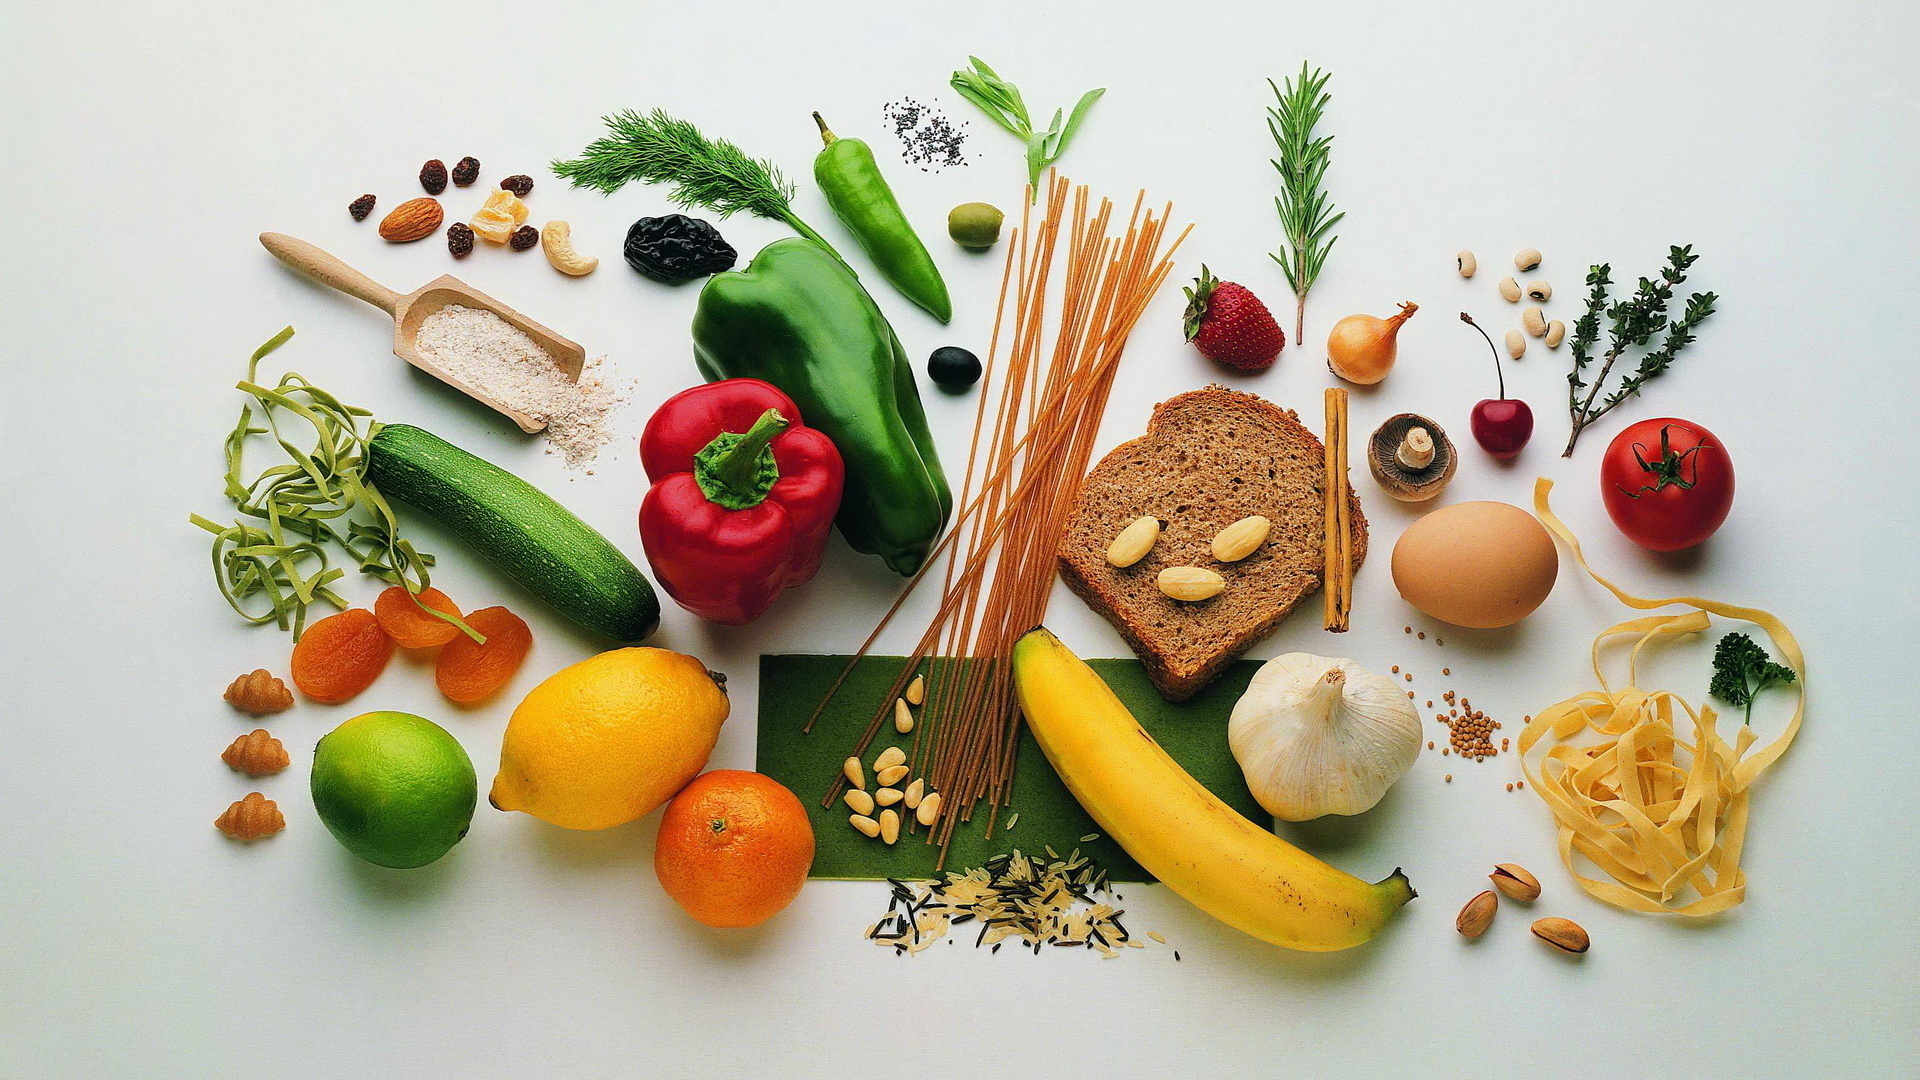

FoodWheel is a startup delivery service that takes away the struggle of deciding where to eat! FoodWheel picks you an amazing local restaurant and lets you order through the app. Senior leadership is getting ready for a big board meeting, and as the resident Data Analyst, you have been enlisted to help decipher data and create a presentation to answer several key questions:

What cuisines does FoodWheel offer? Which areas should the company search for more restaurants to partner with?
How has the average order amount changed over time? What does this say about the trajectory of the company?
How much has each customer on FoodWheel spent over the past six months? What can this tell us about the average FoodWheel customer?

Over this project, you will analyze several DataFrames and create several visualizations to help answer these questions.

We're going to use `pandas` and `matplotlib` for this project.  Import both libraries, under their normal names (`pd` and `plt`).

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Analyze FoodWheel Cuisines

The board wants to make sure that FoodWheel offers a wide variety of restaurants. Having many different options makes customers more likely to come back. Let's create pie chart showing the different types of cuisines available on FoodWheel.

Load and inspect the restaurant data from `restaurant.csv` into a dataframe.

Use this information to create a pie chart.  Make sure that your pie chart includes:
- Labels for each cuisine (i.e, "American", "Chinese", etc.)
- Percent labels using `autopct`
- A title
- Use `plt.axis` to make the pie chart a perfect circle
- `plt.show()` to display your chart

In [133]:
df = pd.read_csv("restaurants.csv")
df.head()

,id,name,neighborhood,cuisine
0,1,Jongro BBQ,Midtown,Korean
1,2,Pocha 32,Midtown,Korean
2,3,Nom Wah Tea Parlor,Chinatown,Chinese
3,4,Roberta’s,Brooklyn,Pizza
4,5,Speedy Romeo,Brooklyn,Pizza


In [134]:
df["cuisine"].value_counts()

Chinese       11
American      10
Italian        8
Pizza          4
Vegetarian     4
Japanese       4
Korean         3
Name: cuisine, dtype: int64

In [135]:
df["cuisine"].value_counts().index

Index(['Chinese', 'American', 'Italian', 'Pizza', 'Vegetarian', 'Japanese',
       'Korean'],
      dtype='object')

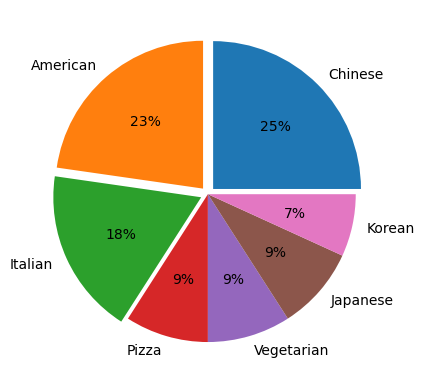

In [136]:
plt.pie(x = df["cuisine"].value_counts(), 
        labels = df["cuisine"].value_counts().index, 
        autopct="%.f%%", 
        explode = [0.05, 0.05, 0.05, 0, 0, 0, 0])
plt.axis()
plt.show()

## Visualize Orders over Time

FoodWheel is a relatively new start up.  They launched one year ago, and have grown more popular since then.  Management suspects that the average order size has increased over time. Create a bar plot that demonstrates the trend in average order size over time.

Create a bar chart to share this data.
- The height of each bar should come from `avg_price`
- Use the standard deviations in `std_order` as the `yerr`
- The error capsize should be 5
- Make sure that you label each bar with the name of the month (i.e., 4 = April).
- Also be sure to label the y-axis
- Give your plot a descriptive title

In [137]:
df2 = pd.read_csv("orders.csv")
df2.head(2)

,id,customer_id,date,price
0,1,61,6-18-2017,13.0
1,2,210,5-8-2017,21.0


In [144]:
df2["month"] = pd.to_datetime(df2["date"]).dt.month

In [148]:
avg_order = df2.groupby("month")["price"].mean().reset_index()
avg_order

,month,price
0,4,9.609195
1,5,14.858824
2,6,15.152174
3,7,18.012821
4,8,21.150685
5,9,29.505882


In [150]:
std_order = df2.groupby("month")["price"].std().reset_index()
std_order

,month,price
0,4,2.562504
1,5,3.395210
2,6,2.835934
3,7,2.848985
4,8,4.455556
5,9,4.518806


In [ ]:
xticks(["April", "May", "June", "July", "August", "September"]

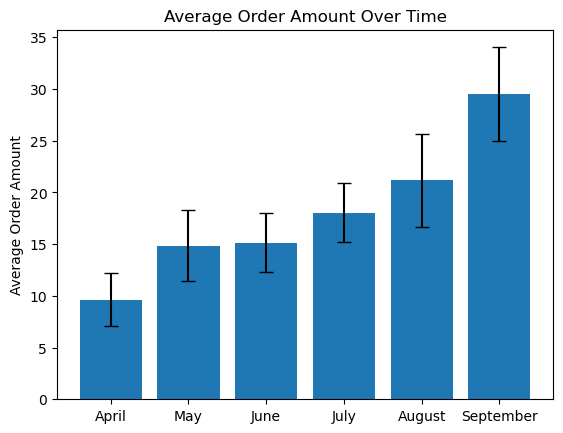

In [165]:
ax = plt.subplot()
plt.bar(x = range(len(avg_order)), height = avg_order["price"], yerr = std_order["price"], capsize = 5)

ax.set_xticks(range(len(avg_order)))
ax.set_xticklabels(["April", "May", "June", "July", "August", "September"])
plt.ylabel("Average Order Amount")
plt.title("Average Order Amount Over Time");

## Analyze Customer types

There is a range of amounts that customers spend at FoodWheel.  Create a histogram of the amount spent by each customer over the past six months with the following format:

- The range should be from 0 to 200
- The number of bins should be 40
- Label the x-axis `Total Spent`
- Label the y-axis `Number of Customers`
- Add a title

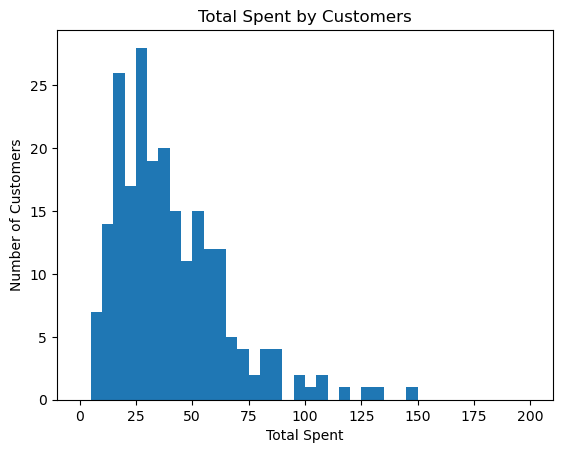

In [184]:
df2.groupby("customer_id")["price"].sum().plot(kind="hist", bins = 40, range = [0, 200])
plt.xlabel("Total Spent")
plt.ylabel("Number of Customers")
plt.title("Total Spent by Customers");

## Challenge

Congratulations!! The team loves your analysis, and plan to use the information you have gathered to make beneficial decisions for the company, and community. There is an additional task of adding the links for each of the paintings to the main list. This task can be considered as a challenge which does not need to be completed to move on to the next section.

After a great round of applause a member of the senior leadership board would quickly like to see the neighborhoods that have the most restaurants. 

Create a visualization to display the restaurant count for each neighborhood.

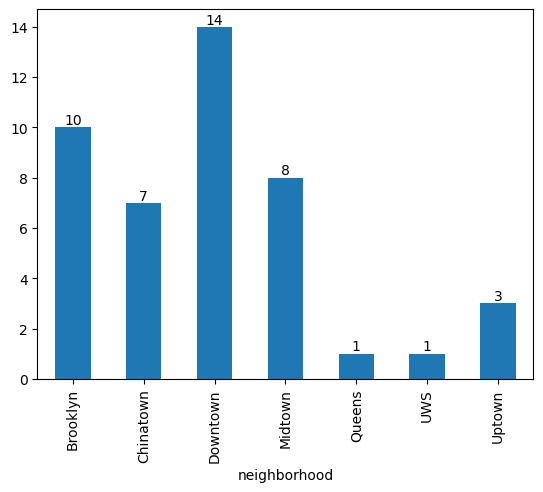

In [73]:
ax = df.groupby("neighborhood")["neighborhood"].count().plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)